# **<p align="center">Predicting The Success of Video Games</p>**
##### <p align="center">Kevin Rathbun</p>

### **1. Introduction**
Video game developers and companies develop their games with one major goal in mind: to produce a successful game.<br>
But what makes a game successful and how would we measure its success? In this data exploration project I will<br>
explore these questions to provide insight and analysis into what makes a game successful. Further, I will create a<br>
method to predict the success of a game based on various metrics. This will be useful for video game developers<br>
in determining what they could be doing to improve their chance of creating a successful game.<br>
<br><br>
TODO UPDATE IF GOALS CHANGE <br>
The metrics I will be looking at are the release date, developer, publisher, supported platforms,<br>
categories and genres the game falls into, price, and hardware requirements to play the game.<br>
This is by no means a comprehensive list of what determines the success of a game, but will serve as useful metrics<br>
in predicting success. To measure success, I will look at average playtimes of users, the ratings of the<br>
game, and the revenue generated from sales.<br>
<br><br>
A dataset produced by Nik Davis on Kaggle (available at https://www.kaggle.com/datasets/nikdavis/steam-store-games)<br>
will serve very nicely for my analysis. This dataset contains the metrics I need on over 27,000 Steam games.<br>
<br><br>
What is Steam? Steam is a digital PC game distribution platform created by Valve Corporation in 2003.<br>
It is the largest and most popular platform for PC gaming worldwide with over 30,000 games. With Steam,<br>
users are able to browse the store for games, watch game trailers, interact and play with friends, receive<br>
tailored game recommendations, and much more. Because of its popularity and huge number of diverse games,<br>
it will be a great platform to use in my exploration.<br>
(sources: https://pcgamesforsteam.com/what-is-steam,<br>
https://www.uktech.news/other_news/best-pc-video-game-digital-distribution-services).<br>

#### The Dataset:<br>
**18 Columns:**<br>
**0: appid:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The unique appid associated with the game<br>
**1: name:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The name of the game<br>
**2: release_date:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;When the game was first released on Steam in YYYY-MM-DD format<br>
**3: english:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;1 if the game is in English, 0 otherwise<br>
**4: developer:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Name(s) of developer(s) separated by semicolon if multiple<br>
**5: publisher:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Name(s) of publisher(s) separated by semicolon if multiple<br>
**6: platforms:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The supported platform(s) separated by semicolons if multiple.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Possible platforms are windows;mac;linux.<br>
**7: required_age:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Minimum age required according to PEGI UK standards.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Entries of 0 are unrated or unsupplied<br>
**8: categories:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Categories associated with the game separated by semicolons e.g., Single-player;Multi-player<br>
**9: genres:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The generes associated with the game separated by semicolons e.g., Action;Indie<br>
**10: steamspy_tags:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;The steamspy_tags associated with the game separated by semicolons.<br>
&nbsp;&nbsp;&nbsp;&nbsp;Similar to genres, but are community voted e.g., Action;Indie<br>
**11: achievements:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Number of achievements in the game<br>
**12: positive_ratings:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Number of positive ratings on Steam<br>
**13: negative_ratings:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Number of negative ratings on Steam<br>
**14: average_playtime:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Average playtime of users in minutes<br>
**15: median_playtime:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Median playtime of users in minutes<br>
**16: owners:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Estimated number of owners (lower and upper bound) e.g., 20000-50000<br>
**17: price:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;Price of game in GBP<br>

#### Important Notes:<br>
It is important to note that this data was gathered around May of 2019, so it is not entirely representative of<br>
the games on Steam today or the metrics associated with them.<br>
It should also be noted that Steam is for PC games *only* so this data is not representative of console games<br>
or their playerbase.<br>

### **2. Gathering and Transforming the Data**
To begin, let's gather the data we need and transform it to suit our goals.<br>
Here we gather the two datasets we need: the dataset described in the introduction<br>
as well as the hardware requirements dataset (also available at https://www.kaggle.com/datasets/nikdavis/steam-store-games).<br>

In [64]:
# Imports
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from statistics import mean, median

In [65]:
# Increase the max number of columns and rows which can be displayed
pd.set_option("max_columns", 500)
pd.set_option("max_rows", 500)
# Load the steam_games csv into a pandas dataframe
games_df = pd.read_csv('steam_games.csv')
# Load the steam_requirements_data into a pandas dataframe
requirements_df = pd.read_csv('steam_requirements_data.csv')
print("Steam games data:")
display(games_df.head(10))
print("Steam game requirements data:")
display(requirements_df.head(10))
print("Value counts of required_age")
print(games_df["required_age"].value_counts())

Steam games data:


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


Steam game requirements data:


,steam_appid,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,10,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
1,20,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
2,30,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
3,40,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
4,50,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
5,60,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
6,70,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
7,80,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,[],[],"500 mhz processor, 96mb ram, 16mb video card, ...",NaN
8,130,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,{'minimum': 'Minimum: OS X Snow Leopard 10.6....,"{'minimum': 'Minimum: Linux Ubuntu 12.04, Dual...","500 mhz processor, 96mb ram, 16mb video card, ...",NaN
9,220,{'minimum': '<strong>Minimum:</strong><br><ul ...,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],"OS: Windows 7, Vista, XP Processor: 1.7 Ghz Me...",NaN


Value counts of required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64


Now, lets transform the dataframe to be better suited for our data analysis by removing unnecessary columns and transforming columns to be better suited for analysis.<br>
<br>
The columns we will be removing are:<br>

**english**: Even if games in English are associated with more or less success, it doesn't really tell us anything<br>
about the game itself.<br>
**achievements**: The number of achievements in a game is most likely not a good indicator of success.<br>
**required_age**: As shown above, the dataset contains mostly 0s for this metric so it will not be very useful.<br>
**positive_ratings and negative_ratings**: Instead, we will have one ratings column for the percent of people who rated positively.<br>
This makes it easier to compare across different games<br>
**steamspy_tags**: Instead, we will just focus on genres. The genres are less nuanced than the tags<br>
making for easier comparisons. There are 300+ tags making it hard to do comparisons between them all.<br>
<br>

The columns we will be transforming are:<br>

**release_date** : Only the year is important<br>
**platforms, categories, genres**: One-hot encode for easier analysis<br>
**owners**: Is currently a range--just take the middle of this range<br>
**minimum**: Currently has all the minimum hardware requirements... Instead we will just look at the minimum ram<br>
requirement (in GB) so we have a metric which can easily be compared across games.

We will also add a new column **est_revenue** which is a product of the number of owners and the price to estimate the revenue of the game<br>
(in GBP)<br>

In [66]:
def transform_owners(x):
    split = x.split("-")
    low = int(split[0])
    high = int(split[1])
    return int((low + high) * 0.5)
def transform_reqs(reqs):
    if (reqs is not np.nan):
        # Remove spaces and make the string lowercase
        reqs = reqs.replace(" ", "")
        reqs = reqs.lower()
        # Find how much ram and the unit (mb or gb)
        res = re.search('[0-9]+(mbram|gbram)', reqs)
        # If found
        if res:
            # The string found (e.g., 96mbram, 1gbram)
            res_str = res.group()
            # If mb, convert to gb and return
            if 'mb' in res_str:
                # Extract the number
                res = re.search('[0-9]+', res_str)
                number = int(res.group())
                # Convert to gb
                return number / 1000
            elif 'gb' in res_str:
                # Extract the number
                res = re.search('[0-9]+', res_str)
                return int(res.group())
        else:
            return np.nan
    else:
        return np.nan

games_df["release_date"] = games_df["release_date"].apply(lambda x: int(x[0:4]))
games_df["owners"] = games_df["owners"].apply(transform_owners)
games_df["rating"] = games_df["positive_ratings"] / (games_df["positive_ratings"] + games_df["negative_ratings"])
# Join the two dataframes on appid
games_df = games_df.join(requirements_df.set_index("steam_appid"), on=["appid"])
# Drop unneeded columns mentioned above
games_df.drop(columns=['english', 'achievements', 'required_age', 'positive_ratings', 'negative_ratings', 'steamspy_tags'], inplace=True)
# Drop unneeded columns resulting from joining the 2 dataframes
games_df.drop(columns=['pc_requirements', 'mac_requirements', 'linux_requirements', 'recommended'], inplace=True)
games_df["minimum"] = games_df["minimum"].apply(transform_reqs)
# Raname "minimum" to "min_req_ram"
games_df.rename(columns={'minimum': 'min_req_ram'}, inplace=True)
games_df["est_revenue"] = games_df["owners"] * games_df["price"]
display(games_df.head(10))

,appid,name,release_date,developer,publisher,platforms,categories,genres,average_playtime,median_playtime,owners,price,rating,min_req_ram,est_revenue
0,10,Counter-Strike,2000,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,17612,317,15000000,7.19,0.973888,0.096,107850000.0
1,20,Team Fortress Classic,1999,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,277,62,7500000,3.99,0.839787,0.096,29925000.0
2,30,Day of Defeat,2003,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,187,34,7500000,3.99,0.895648,0.096,29925000.0
3,40,Deathmatch Classic,2001,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,258,184,7500000,3.99,0.826623,0.096,29925000.0
4,50,Half-Life: Opposing Force,1999,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,624,415,7500000,3.99,0.947996,0.096,29925000.0
5,60,Ricochet,2000,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,175,10,7500000,3.99,0.801278,0.096,29925000.0
6,70,Half-Life,1998,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,1300,83,7500000,7.19,0.961878,0.096,53925000.0
7,80,Counter-Strike: Condition Zero,2004,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,427,43,15000000,7.19,0.893871,0.096,107850000.0
8,130,Half-Life: Blue Shift,2001,Gearbox Software,Valve,windows;mac;linux,Single-player,Action,361,205,7500000,3.99,0.900990,0.096,29925000.0
9,220,Half-Life 2,2004,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Steam Trading...,Action,691,402,15000000,7.19,0.965601,0.512,107850000.0


In [67]:
# A helper function used to see the unique elements over an entire column in games_df.
# Each element of the column should be a list e.g., ['Action', 'Indie']
def unique_col_elts(column_name):
    col_as_list = [x for x in games_df[column_name]]
    new = []

    for e in col_as_list:
        for e1 in e:
            if e1 not in new:
                new.append(e1)

    print("Unique entries:")
    print(new)
    print("Length:")
    print(len(new))

# Turn platforms column into a list splitting on ';' in order to do one-hot encoding
games_df["platforms"] = games_df["platforms"].apply(lambda x: x.split(';'))
# One-hot encode platforms
mlb = MultiLabelBinarizer()
mlb.fit(games_df['platforms'])
new_col_names = ["platform_%s" % c for c in mlb.classes_]
# Create new DataFrame with one-hot encoded platforms
platforms = pd.DataFrame(mlb.fit_transform(games_df['platforms']), columns=new_col_names, index=games_df['platforms'].index)
# Join platforms into games_df
games_df = games_df.join(platforms)

# Turn genres column into a list splitting on ';' in order to do one-hot encoding
games_df["genres"] = games_df["genres"].apply(lambda x: x.split(';'))
# One-hot encode genres
mlb = MultiLabelBinarizer()
mlb.fit(games_df['genres'])
new_col_names = ["genre_%s" % c for c in mlb.classes_]
# Create new DataFrame with one-hot encoded genres
genres = pd.DataFrame(mlb.fit_transform(games_df['genres']), columns=new_col_names, index=games_df['genres'].index)
# Join genres into games_df
games_df = games_df.join(genres)

# Turn categories column into a list splitting on ';' in order to do one-hot encoding
games_df["categories"] = games_df["categories"].apply(lambda x: x.split(';'))
# One-hot encode categories
mlb = MultiLabelBinarizer()
mlb.fit(games_df['categories'])
new_col_names = ["category_%s" % c for c in mlb.classes_]
# Create new DataFrame with one-hot encoded categories
categories = pd.DataFrame(mlb.fit_transform(games_df['categories']), columns=new_col_names, index=games_df['categories'].index)
# Join categories into games_df
games_df = games_df.join(categories)

display(games_df.head(10))
print("Dimensionality of DataFrame:")
print(games_df.shape)

,appid,name,release_date,developer,publisher,platforms,categories,genres,average_playtime,median_playtime,owners,price,rating,min_req_ram,est_revenue,platform_linux,platform_mac,platform_windows,genre_Accounting,genre_Action,genre_Adventure,genre_Animation & Modeling,genre_Audio Production,genre_Casual,genre_Design & Illustration,genre_Documentary,genre_Early Access,genre_Education,genre_Free to Play,genre_Game Development,genre_Gore,genre_Indie,genre_Massively Multiplayer,genre_Nudity,genre_Photo Editing,genre_RPG,genre_Racing,genre_Sexual Content,genre_Simulation,genre_Software Training,genre_Sports,genre_Strategy,genre_Tutorial,genre_Utilities,genre_Video Production,genre_Violent,genre_Web Publishing,category_Captions available,category_Co-op,category_Commentary available,category_Cross-Platform Multiplayer,category_Full controller support,category_In-App Purchases,category_Includes Source SDK,category_Includes level editor,category_Local Co-op,category_Local Multi-Player,category_MMO,category_Mods,category_Mods (require HL2),category_Multi-player,category_Online Co-op,category_Online Multi-Player,category_Partial Controller Support,category_Shared/Split Screen,category_Single-player,category_Stats,category_Steam Achievements,category_Steam Cloud,category_Steam Leaderboards,category_Steam Trading Cards,category_Steam Turn Notifications,category_Steam Workshop,category_SteamVR Collectibles,category_VR Support,category_Valve Anti-Cheat enabled
0,10,Counter-Strike,2000,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Local Mult...",[Action],17612,317,15000000,7.19,0.973888,0.096,107850000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,20,Team Fortress Classic,1999,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Local Mult...",[Action],277,62,7500000,3.99,0.839787,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,30,Day of Defeat,2003,Valve,Valve,"[windows, mac, linux]","[Multi-player, Valve Anti-Cheat enabled]",[Action],187,34,7500000,3.99,0.895648,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,40,Deathmatch Classic,2001,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Local Mult...",[Action],258,184,7500000,3.99,0.826623,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,50,Half-Life: Opposing Force,1999,Gearbox Software,Valve,"[windows, mac, linux]","[Single-player, Multi-player, Valve Anti-Cheat...",[Action],624,415,7500000,3.99,0.947996,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,60,Ricochet,2000,Valve,Valve,"[windows, mac, linux]","[Multi-player, Online Multi-Player, Valve Anti...",[Action],175,10,7500000,3.99,0.801278,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6,70,Half-Life,1998,Valve,Valve,"[windows, mac, linux]","[Single-player, Multi-player, Online Multi-Pla...",[Action],1300,83,7500000,7.19,0.961878,0.096,53925000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
7,80,Counter-Strike: Condition Zero,2004,Valve,Valve,"[windows, mac, linux]","[Single-player, Multi-player, Valve Anti-Cheat...",[Action],427,43,15000000,7.19,0.893871,0.096,107850000.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,130,Half-Life: Blue Shift,2001,Gearbox Software,Valve,"[windows, mac, linux]",[Single-player],[Action],361,205,7500000,3.99,0.900990,0.096,29925000.0,1,1,1,0,1,0,0,0,0,0,0

Dimensionality of DataFrame:
(27075, 76)


We now have our DataFrame with all the necessary data and in the form we want it.<br>
We can now move on to the next step.

### **3. Exploring the Data: Visualization and Analysis**

We will now work to visualize the data in order to find trends.<br>

#### **3.1 Game Genre and Success**

Let's begin by looking at how the genre of a game relates to its success.<br>
We will look at how the genre relates to the revenue, playtime, and rating.<br>

In [68]:
unique_col_elts('genres')

Unique entries:
['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Animation & Modeling', 'Video Production', 'Casual', 'Simulation', 'Racing', 'Violent', 'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Utilities', 'Design & Illustration', 'Web Publishing', 'Education', 'Software Training', 'Sexual Content', 'Audio Production', 'Game Development', 'Photo Editing', 'Accounting', 'Documentary', 'Tutorial']
Length:
29


As shown above, there are a lot of different genres and many of them are not associated with video games.<br>
From the above list, we will only look at 17:<br>
<br>
Action, Free to Play, Strategy, Adventure, Indie, RPG, Casual, Simulation, Racing, Violent, <br>
Massively Multiplayer, Nudity, Sports, Early Access, Gore, Education, and Sexual Content.<br>
<br>
This means we will be ignoring 12:<br>
<br>
Animation & Modeling, Video Production, Utilities, Design & Illustration, Web Publishing, Software Training,<br>
Audio Production, Game Development, Photo Editing, Accounting, Documentary, and Tutorial.<br>
<br>
These 12 are not tags associated with video games on Steam, so we can ignore them in our analysis.<br>

##### **Revenue**

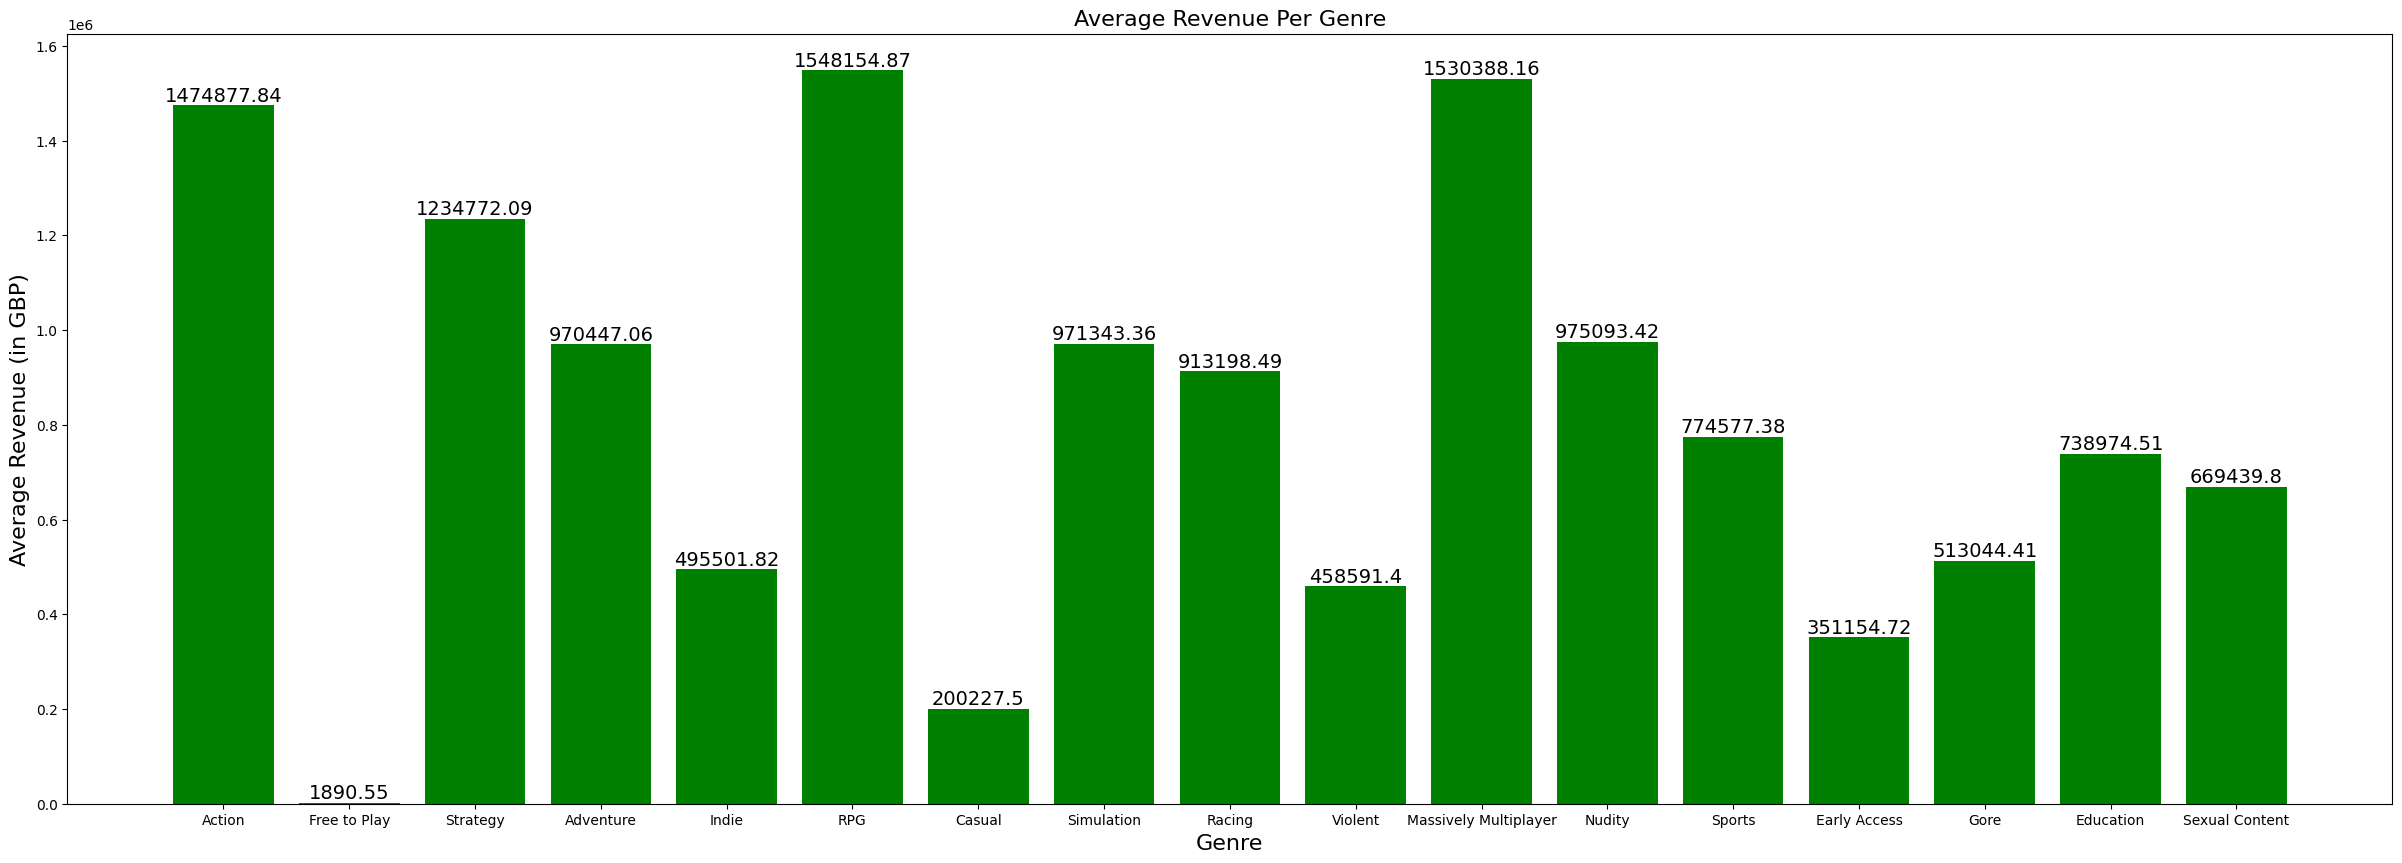

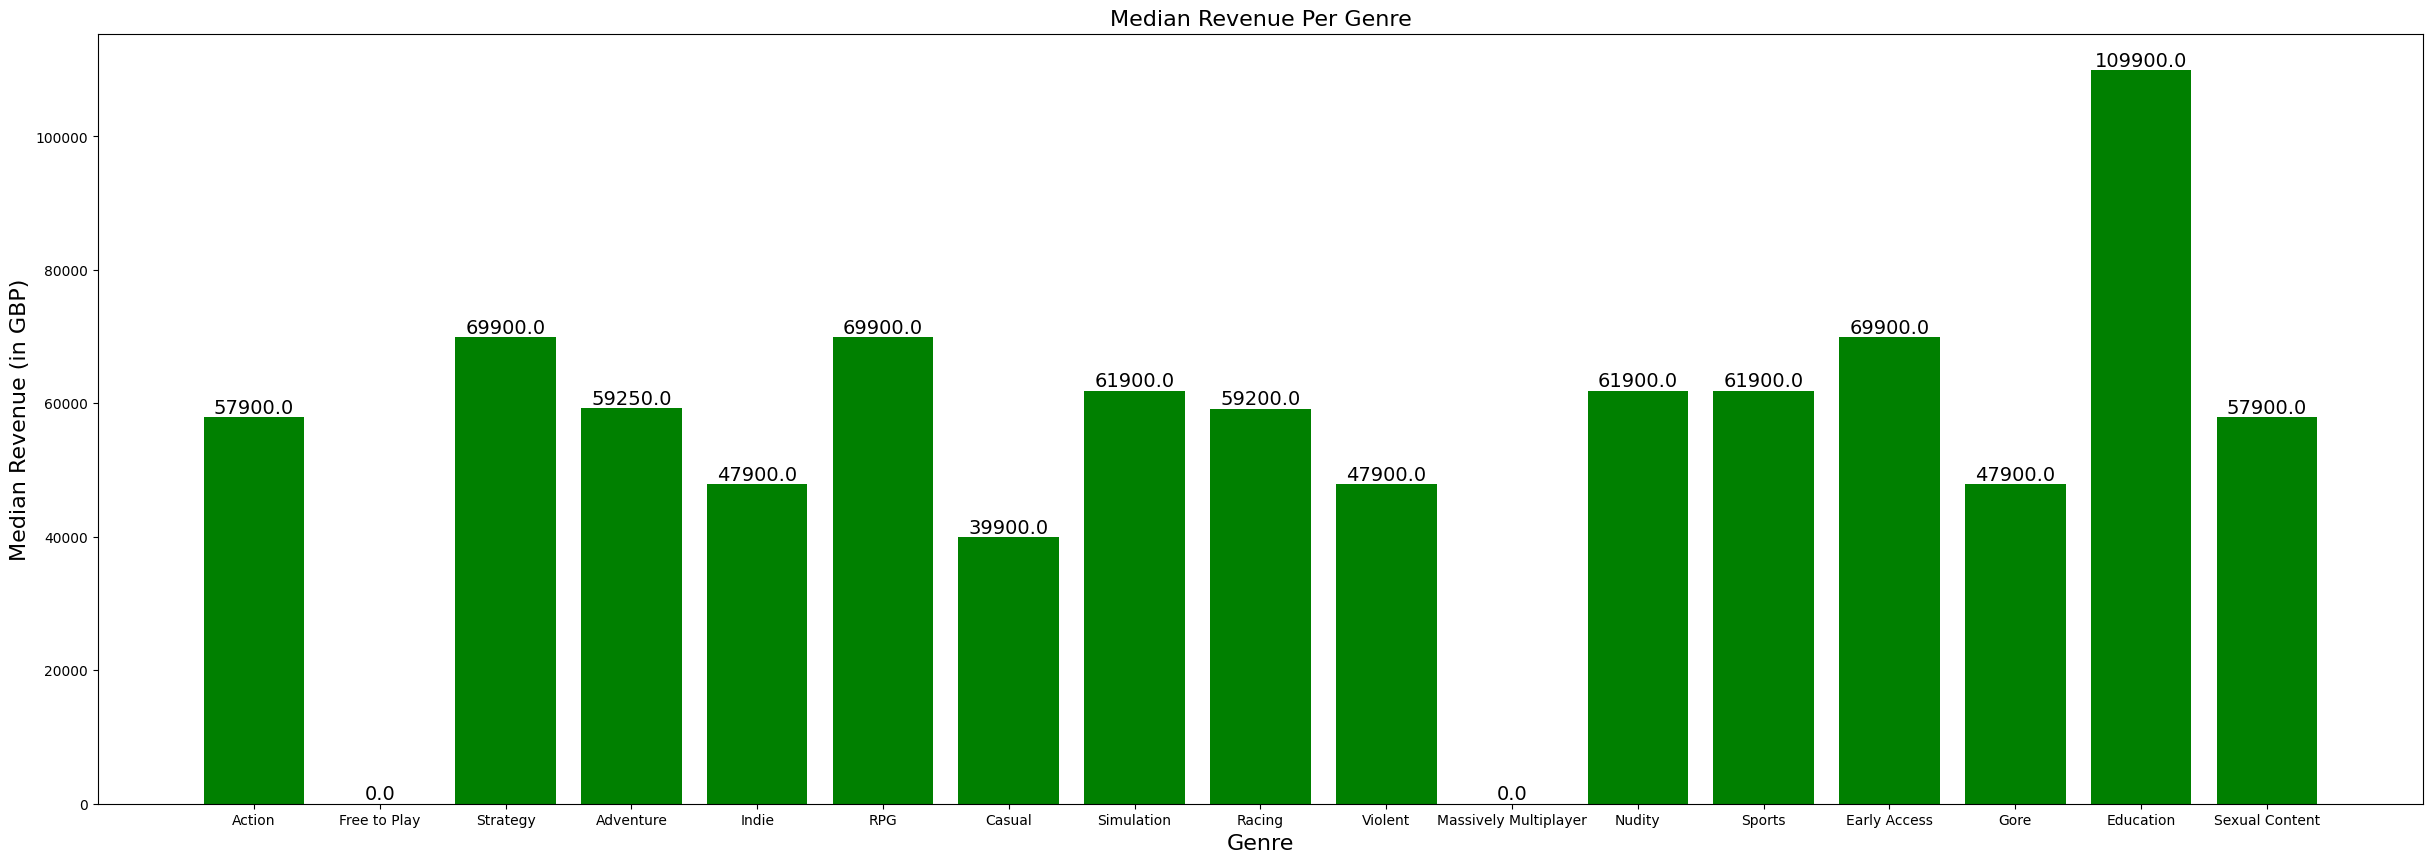

In [69]:
genres = ['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Casual', 'Simulation', 'Racing', 'Violent', \
    'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Education', 'Sexual Content']

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Average Revenue (in GBP)", fontsize=16)
plt.title("Average Revenue Per Genre", fontsize=16)

genre_to_rev = {}
# For each genre we will plot the average revenue
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # There is only one game with a revenue of more than 0.5*10^9 (has value 2*10^9)
    # We can drop this outlier.
    filtered_df = filtered_df.drop(filtered_df[filtered_df["est_revenue"] > 0.5*10**9].index)
    # Round to avoid long chart labels
    genre_to_rev.update({genre : round(mean(filtered_df['est_revenue']), 2)})

barplot = plt.bar(genre_to_rev.keys(), genre_to_rev.values(), color='green')
plt.bar_label(barplot, labels=genre_to_rev.values(), fontsize=14)
plt.show()

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Median Revenue (in GBP)", fontsize=16)
plt.title("Median Revenue Per Genre", fontsize=16)

genre_to_rev = {}
# For each genre we will plot the median revenue
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # There is only one game with a revenue of more than 0.5*10^9 (has value 2*10^9)
    # We can drop this outlier.
    filtered_df = filtered_df.drop(filtered_df[filtered_df["est_revenue"] > 0.5*10**9].index)
    # Round to avoid long chart labels
    genre_to_rev.update({genre : round(median(filtered_df['est_revenue']), 2)})

barplot = plt.bar(genre_to_rev.keys(), genre_to_rev.values(), color='green')
plt.bar_label(barplot, labels=genre_to_rev.values(), fontsize=14)
plt.show()

As we can see, in terms of average revenue over all games, Action, RPG, and Massively Multiplayer games<br>
are the most successful. These three genres have a very similar average revenue and are significantly ahead<br>
of the next closest genre (Strategy games). All of these games have an average revenue of over £1,000,000.<br>
<br>
The 4 genres which have the highest **average** revenue (descending):<br>
1) RPG<br>
2) Massively Multiplayer<br>
3) Action<br>
4) Strategy.<br>


This is extremely different when we instead look at the median revenue. For all 17 genres, the median revenue<br>
is significantly less than the average revenue.<br>
<br>
The 4 genres which have the highest **median** revenue (descending):<br>
1) Education<br>
2) Strategy, RPG, Early Access (tied)<br>
3) Simulation, Nudity, Sports (tied)<br>
4) Adventure<br>


Since all of the median revenues are significantly less than the average revenues, this indicates that<br>
a small percent of the games in each genre have a very high revenue. This is especially prevalent in the<br>
RPG, Massively Multiplayer, Action, and Strategy genres since they experience the most dramatic drop.<br>
This is not too suprising. Many games may go unnoticed or get little traction, while some games will<br>
become very popular. This just shows us that RPG, Massively Multiplayer, Action, and Strategy genres<br>
experience this the greatest: some of the games in these genres become extremely popular (more so than<br>
other genres).<br>

In [70]:
print("The number of Education games:")
print(sum(games_df['genre_Education']))
print("The number of Massively Multiplayer games:")
print(sum(games_df["genre_Massively Multiplayer"]))
print("The number of Free Massively Multiplayer games:")
print(len(games_df.loc[(games_df["genre_Massively Multiplayer"] == 1) & (games_df["price"] == 0)]))

The number of Education games:
51
The number of Massively Multiplayer games:
723
The number of Free Massively Multiplayer games:
375


A couple other interesting results from these graphs are the median revenue of 0 for Massively Multiplayer<br>
games and the relatively high Education median. The median revenue of 0 for the Massively Multiplayer games<br>
can be explained by the fact that over half of the Massively Multiplayer games are free to play.<br>
The high median revenue for the Education games can be explained by the fact that there are so few Education<br>
games.

##### **Playtime**

Now let's look at the average and median playtimes for each of these genres.

In [71]:
# TODO COME BACK WHEN YOU KNOW ABOUT AVERAGES OF AVERAGES AND MEDIANS OF MEDIANS TODO

##### **Ratings**

Now let's look at the average ratings of games for each of these genres.

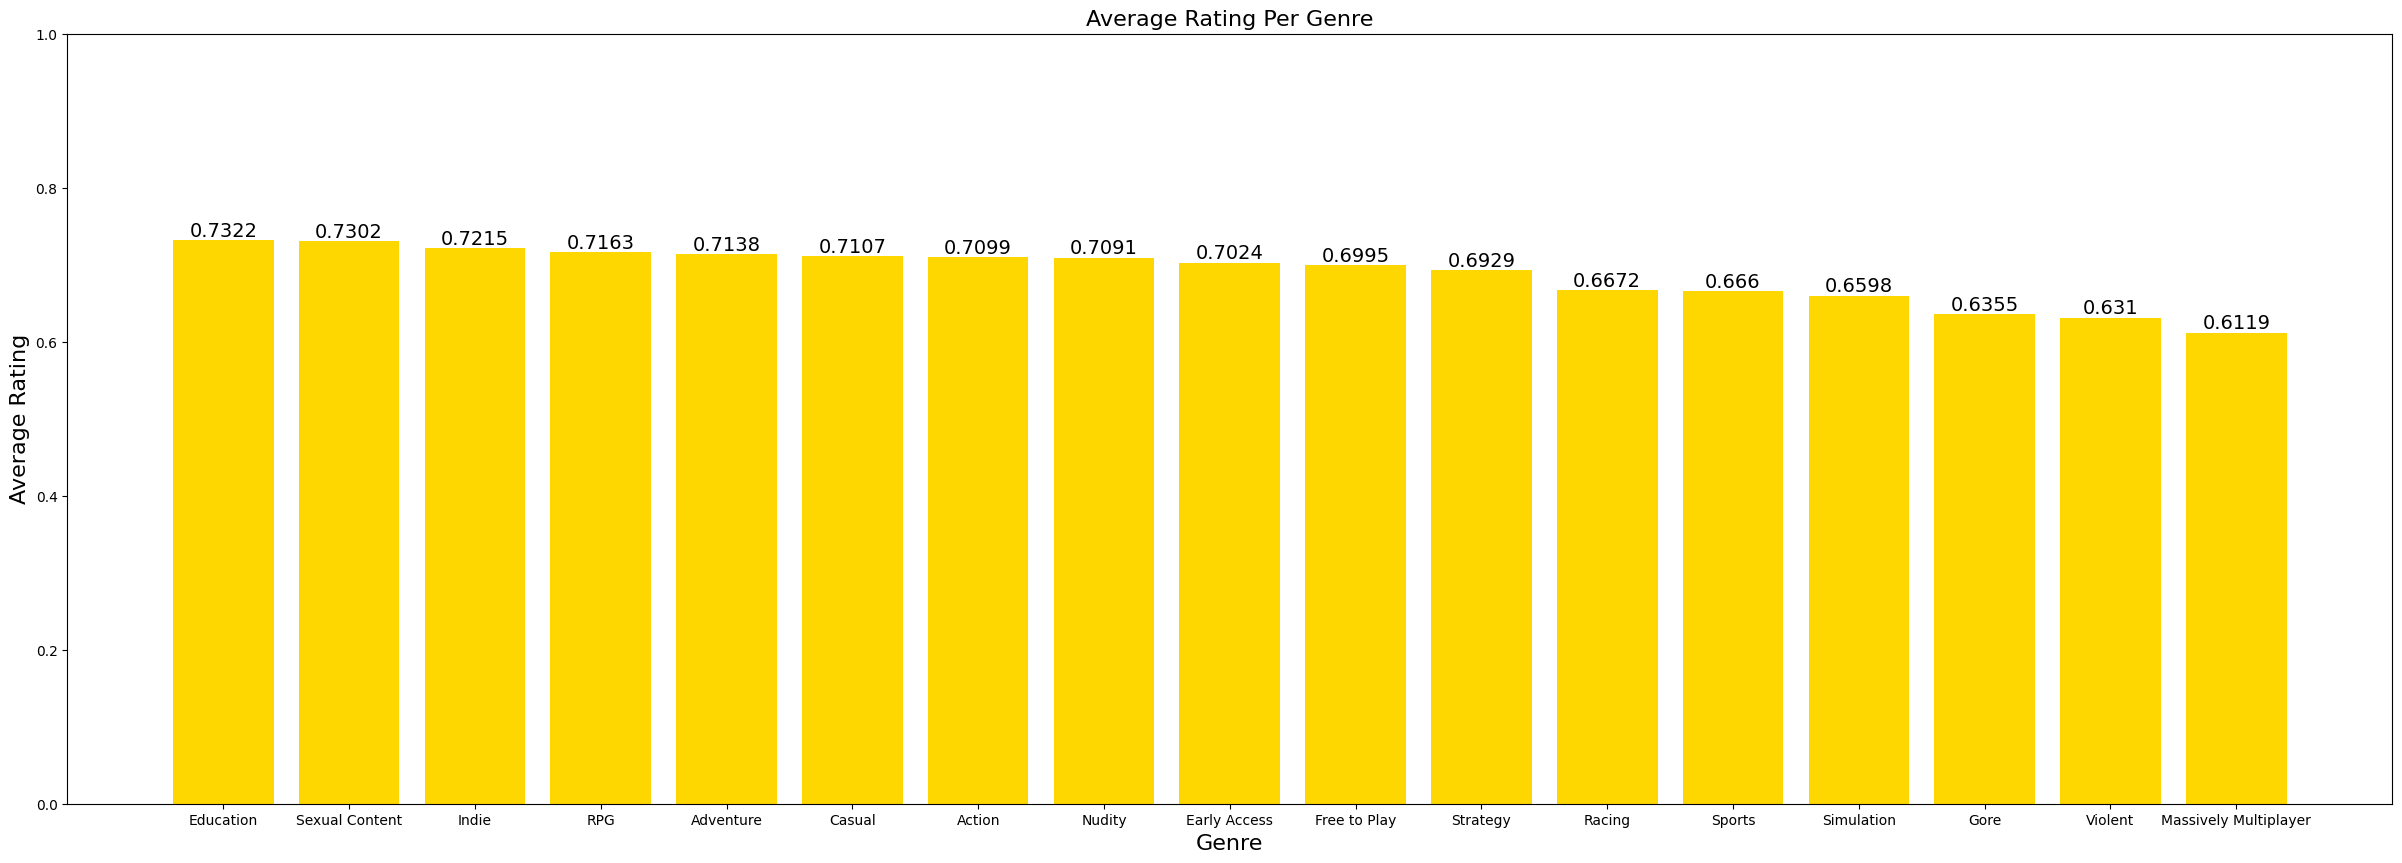

In [72]:
genres = ['Action', 'Free to Play', 'Strategy', 'Adventure', 'Indie', 'RPG', 'Casual', 'Simulation', 'Racing', 'Violent', \
    'Massively Multiplayer', 'Nudity', 'Sports', 'Early Access', 'Gore', 'Education', 'Sexual Content']

plt.figure(figsize=(30,10))
plt.xlabel("Genre", fontsize=16)
plt.ylabel("Average Rating", fontsize=16)
plt.title("Average Rating Per Genre", fontsize=16)

genre_to_rating = {}
# For each genre we will plot the average rting
for genre in genres:
    # Filter the df to just include the rows/games which are the genre 'genre'
    filtered_df = games_df.loc[games_df["genre_" + genre] == 1]
    # Round to avoid long chart labels
    genre_to_rating.update({genre : round(mean(filtered_df['rating']), 4)})

# Sort genre_to_rating in descending order
sorted_dict = dict(sorted(genre_to_rating.items(), key=lambda x:x[1], reverse=True))
barplot = plt.bar(sorted_dict.keys(), sorted_dict.values(), color='gold')
plt.bar_label(barplot, labels=sorted_dict.values(), fontsize=14)
plt.ylim([0, 1])
plt.show()